In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from preprocessing import complete_vars
from preprocessing import ratios
from preprocessing import breakdown_vars
from preprocessing import dummies_ohe
from preprocessing import Xy
from preprocessing import std_z
from imblearn.under_sampling import RandomUnderSampler
from gentools import plot_stats
from ineq import Theil
from GeneticNeuralNetwork import gaMLP_ragnarok
from sklearn.metrics import classification_report
from NeuralNetwork import MLPclassifer
from NeuralNetwork import MLP
from ineq import Theil
from NeuralNetwork  import MLP
from LocalSearch import SA_max
from sklearn.metrics import f1_score
from LocalSearch import search
from LocalSearch import SA_min
from sklearn.metrics import recall_score
from GeneticNeuralNetwork import gaMLP_score
from gentools import plot_stats
from sklearn.model_selection import StratifiedKFold
from gentools import select_optimun_parameters

In [2]:
# Experiments .....
df_train = pd.read_csv("Datapooled.csv")

VARS = ['Ganancia bruta', 'Ganancia (pérdida)','Ingresos de actividades ordinarias' , 'Costo de ventas', 'Patrimonio total',
     'Total pasivos', 'Total de activos', 'Ganancias acumuladas',  'Pasivos corrientes totales',  'Activos corrientes totales']

df_train.rename(columns={'Clasificación Industrial Internacional Uniforme Versión 4 A.C':'Sector'}, inplace=True)

df_train = df_train[VARS+[ 'event', 'Sector']]
print(df_train[df_train['event']==1].info())
df_train['complete-vars'] = complete_vars(df_train) #1 is that have all variables!
df_train =  df_train[df_train['complete-vars']==1] #filtering firms that have not financial information 
print(df_train[df_train['event']==1].info())
df_train = ratios(df_train)
predictors =[ 'GPM', 'NPM', 'ROE','ROA', 'IR', 'DER', 'RSL', 'CR', 'Ax1', 'Ax2', 'Sector']
print(df_train[df_train['event']==1].info())
df_train.replace([np.inf,-np.inf], np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.drop(columns=['complete-vars'], inplace=True)
df_train = df_train[predictors + ['event']].copy()
df_exp = df_train.copy()
cat, nonormal, normal  = breakdown_vars(df_exp) 
X, y = Xy(df_train, 'event')
cat, nonormal, normal  = breakdown_vars(X)
nums = nonormal + normal
X = dummies_ohe(X, cat) 
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 666, stratify=y)
print(y_train.value_counts())
rus = RandomUnderSampler(random_state=123)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train = std_z(nums, X_train)
X_test = std_z(nums = nums, df_ = X_test)

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 4 to 26499
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ganancia bruta                      353 non-null    float64
 1   Ganancia (pérdida)                  353 non-null    float64
 2   Ingresos de actividades ordinarias  353 non-null    float64
 3   Costo de ventas                     330 non-null    float64
 4   Patrimonio total                    353 non-null    float64
 5   Total pasivos                       353 non-null    float64
 6   Total de activos                    353 non-null    float64
 7   Ganancias acumuladas                351 non-null    float64
 8   Pasivos corrientes totales          352 non-null    float64
 9   Activos corrientes totales          353 non-null    float64
 10  event                               771 non-null    float64
 11  Sector                              771 non-null

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [3]:
# Optimize f1..
# Directly optimization....
vars = ['ROE', 'ROA',
         'IR', 'RSL', 
         'Sector_D', 'Sector_E', 
         'Sector_G','Sector_J', 
         'Sector_K', 'Sector_L', 
         'Sector_M', 'Sector_O', 
         'Sector_Q','Sector_R']

# 32m 22.6 segundos para obtener las variables
X_train, X_test = X_train.loc[:, vars],  X_test.loc[:, vars]

architecture = (5,5,1) 
Pop_sizes  = [75]             # 75
generations = [150]           
Mutations = [0.07, 0.09]  #0.05, 0.09
Tournaments = [5] # 3,5 
Cross = [0.75, 0.85] # 0.75, 85
probs_mate = [0.5]  
probs_mutate = [0.04, 0.06]

regist = gaMLP_ragnarok(
    mutations = Mutations,
    architecture = architecture,
    pop_sizes = Pop_sizes,
    cross = Cross,
    max_generations= generations,
    tournament_sizes = Tournaments,
    mate_indpb = probs_mate,
    mutate_indpb = probs_mutate,
    classifier = MLPclassifer,
    ineq_measure = Theil,
    ineq_min = 0,
    k_folds=2,
    limit_unchanged = 100,
    X_train = X_train,
    y_train = y_train,
    verbose = True,
)

----------------------------------------
(75, 150, 5, 0.07, 0.75, 0.5, 0.04)
----------------------------------------
---------------
Generation:  1
---------------
Fitest : 0.7280781758957655 Inequality:  0.00899741182032222 Generation without improvement:  0
Stats mean:  0.6133037823694242 std:  0.1385010874729486 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.00899741182032222 0 (0.6133037823694242, 0.1385010874729486, 0.0, 0.7280781758957655)
---------------
Generation:  2
---------------
Fitest : 0.7280781758957655 Inequality:  0.004491866702522095 Generation without improvement:  0
Stats mean:  0.6385252800353898 std:  0.10997215225114097 min: 0.1516525909707017 max:  0.7280781758957655
0.7280781758957655 0.004491866702522095 0 (0.6385252800353898, 0.10997215225114097, 0.1516525909707017, 0.7280781758957655)
---------------
Generation:  3
---------------
Fitest : 0.7280781758957655 Inequality:  0.01298987205558739 Generation without improvement:  1
Stats mean:  0.60785012

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.7280781758957655 Inequality:  0.009034086926966911 Generation without improvement:  0
Stats mean:  0.6132324963699944 std:  0.13873249461899734 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.009034086926966911 0 (0.6132324963699944, 0.13873249461899734, 0.0, 0.7280781758957655)
---------------
Generation:  2
---------------
Fitest : 0.7280781758957655 Inequality:  0.006776986467487708 Generation without improvement:  0
Stats mean:  0.6289585166830387 std:  0.1213417533348576 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.006776986467487708 0 (0.6289585166830387, 0.1213417533348576, 0.0, 0.7280781758957655)
---------------
Generation:  3
---------------
Fitest : 0.7280781758957655 Inequality:  0.010289700231545924 Generation without improvement:  1
Stats mean:  0.6197039002738237 std:  0.14338588543066486 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.010289700231545924 1 (0.6197039002738237, 0.14338588543

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.6719623748101593 Inequality:  0.018286653214694405 Generation without improvement:  0
Stats mean:  0.5695025255396523 std:  0.18447808078607097 min: 0.0 max:  0.6719623748101593
0.6719623748101593 0.018286653214694405 0 (0.5695025255396523, 0.18447808078607097, 0.0, 0.6719623748101593)
---------------
Generation:  2
---------------
Fitest : 0.6906438811626328 Inequality:  0.007385343261928518 Generation without improvement:  0
Stats mean:  0.6147929366308481 std:  0.13475608048421236 min: 0.08088235294117646 max:  0.6906438811626328
0.6906438811626328 0.007385343261928518 0 (0.6147929366308481, 0.13475608048421236, 0.08088235294117646, 0.6906438811626328)
---------------
Generation:  3
---------------
Fitest : 0.6926687166208125 Inequality:  0.003920482616707673 Generation without improvement:  0
Stats mean:  0.6445476612334069 std:  0.09646489829163407 min: 0.030539772727272728 max:  0.6926687166208125
0.6926687166208125 0.0039

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.6719623748101593 Inequality:  0.018287699693399048 Generation without improvement:  0
Stats mean:  0.5689081427265641 std:  0.1843354895587239 min: 0.0 max:  0.6719623748101593
0.6719623748101593 0.018287699693399048 0 (0.5689081427265641, 0.1843354895587239, 0.0, 0.6719623748101593)
---------------
Generation:  2
---------------
Fitest : 0.667550839964633 Inequality:  0.003392567870399336 Generation without improvement:  0
Stats mean:  0.6481028872937108 std:  0.08155862654393764 min: 0.0 max:  0.667550839964633
0.667550839964633 0.003392567870399336 0 (0.6481028872937108, 0.08155862654393764, 0.0, 0.667550839964633)
---------------
Generation:  3
---------------
Fitest : 0.6666666666666666 Inequality:  4.626396659988769e-05 Generation without improvement:  1
Stats mean:  0.6632150760539243 std:  0.01307129156994368 min: 0.590441484460082 max:  0.6666666666666666
0.6666666666666666 4.626396659988769e-05 1 (0.6632150760539243, 0

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.7280781758957655 Inequality:  0.010010798143224305 Generation without improvement:  0
Stats mean:  0.6071554874124586 std:  0.1461193327441295 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.010010798143224305 0 (0.6071554874124586, 0.1461193327441295, 0.0, 0.7280781758957655)
---------------
Generation:  2
---------------
Fitest : 0.7280781758957655 Inequality:  0.011743246314162457 Generation without improvement:  0
Stats mean:  0.6174006233134771 std:  0.14994290242946073 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.011743246314162457 0 (0.6174006233134771, 0.14994290242946073, 0.0, 0.7280781758957655)
---------------
Generation:  3
---------------
Fitest : 0.7280781758957655 Inequality:  0.010504140513379032 Generation without improvement:  1
Stats mean:  0.6246635348956505 std:  0.1451441452936117 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.010504140513379032 1 (0.6246635348956505, 0.145144145293

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.7280781758957655 Inequality:  0.008729834096512809 Generation without improvement:  0
Stats mean:  0.6166378867512289 std:  0.13611012279555282 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.008729834096512809 0 (0.6166378867512289, 0.13611012279555282, 0.0, 0.7280781758957655)
---------------
Generation:  2
---------------
Fitest : 0.7280781758957655 Inequality:  0.006108879577325331 Generation without improvement:  0
Stats mean:  0.6345535138608169 std:  0.11700109704649479 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.006108879577325331 0 (0.6345535138608169, 0.11700109704649479, 0.0, 0.7280781758957655)
---------------
Generation:  3
---------------
Fitest : 0.7336601307189543 Inequality:  0.01117466942595646 Generation without improvement:  1
Stats mean:  0.6257419229904416 std:  0.1486517512411739 min: 0.0 max:  0.7336601307189543
0.7336601307189543 0.01117466942595646 1 (0.6257419229904416, 0.148651751241

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.6719623748101593 Inequality:  0.018304598456933427 Generation without improvement:  0
Stats mean:  0.5694274958091129 std:  0.18457045401104824 min: 0.0 max:  0.6719623748101593
0.6719623748101593 0.018304598456933427 0 (0.5694274958091129, 0.18457045401104824, 0.0, 0.6719623748101593)
---------------
Generation:  2
---------------
Fitest : 0.6719623748101593 Inequality:  0.0005479860747743562 Generation without improvement:  0
Stats mean:  0.6554254066045371 std:  0.04298933687347131 min: 0.4239791785166417 max:  0.6719623748101593
0.6719623748101593 0.0005479860747743562 0 (0.6554254066045371, 0.04298933687347131, 0.4239791785166417, 0.6719623748101593)
---------------
Generation:  3
---------------
Fitest : 0.6999407802205937 Inequality:  0.014043454794872436 Generation without improvement:  1
Stats mean:  0.6103488735290767 std:  0.15934883015885376 min: 0.0 max:  0.6999407802205937
0.6999407802205937 0.014043454794872436 1 

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.6719623748101593 Inequality:  0.018289845374907198 Generation without improvement:  0
Stats mean:  0.5694090513075574 std:  0.18448101838938116 min: 0.0 max:  0.6719623748101593
0.6719623748101593 0.018289845374907198 0 (0.5694090513075574, 0.18448101838938116, 0.0, 0.6719623748101593)
---------------
Generation:  2
---------------
Fitest : 0.6781519109820997 Inequality:  0.0032722850683159724 Generation without improvement:  0
Stats mean:  0.6530208532100764 std:  0.0795868676653429 min: 0.0 max:  0.6781519109820997
0.6781519109820997 0.0032722850683159724 0 (0.6530208532100764, 0.0795868676653429, 0.0, 0.6781519109820997)
---------------
Generation:  3
---------------
Fitest : 0.6924281713515196 Inequality:  0.0014873069071927958 Generation without improvement:  1
Stats mean:  0.6513544589180222 std:  0.06641687784616629 min: 0.24775301424917795 max:  0.6924281713515196
0.6924281713515196 0.0014873069071927958 1 (0.65135445891

In [4]:
parameters_ = select_optimun_parameters(regist=regist,
                           architecture=architecture,
                             k_folds=10, 
                             X_train=X_train, 
                             y_train=y_train,
                             assessment_metric = recall_score)

From here is the fittest (75, 150, 5, 0.07, 0.75, 0.5, 0.04)
(0.9023076923076923, 0.0035999999999999366)


In [5]:
fittest_individual, history, stats = gaMLP_score(
                    classifier = MLPclassifer,
                    architecture= architecture,
                    population_size=parameters_[0],
                    max_generations= parameters_[1],
                    tournament_size=parameters_[2],
                    MUTPB=parameters_[3],
                    CXPB=parameters_[4], 
                    mate_indpb= parameters_[5],
                    mutate_indpb=parameters_[6],
                    ineq_measure=Theil,
                    ineq_min  = 0,
                    limit_unchanged=100,
                    k_folds=2,
                    X_train = X_train, 
                    y_train = y_train,
                    verbose=True)

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.7280781758957655 Inequality:  0.00899741182032222 Generation without improvement:  0
Stats mean:  0.6133037823694242 std:  0.1385010874729486 min: 0.0 max:  0.7280781758957655
0.7280781758957655 0.00899741182032222 0 (0.6133037823694242, 0.1385010874729486, 0.0, 0.7280781758957655)
---------------
Generation:  2
---------------
Fitest : 0.7280781758957655 Inequality:  0.004491866702522095 Generation without improvement:  0
Stats mean:  0.6385252800353898 std:  0.10997215225114097 min: 0.1516525909707017 max:  0.7280781758957655
0.7280781758957655 0.004491866702522095 0 (0.6385252800353898, 0.10997215225114097, 0.1516525909707017, 0.7280781758957655)
---------------
Generation:  3
---------------
Fitest : 0.7280781758957655 Inequality:  0.01298987205558739 Generation without improvement:  1
Stats mean:  0.6078501253005644 std:  0.16751264514261766 min: 0.052925281954887216 max:  0.7280781758957655
0.7280781758957655 0.01298987205

In [6]:
MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=fittest_individual, score=f1_score)

c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(0.05611573871109163,)

In [7]:
preds_GA = np.where(MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=fittest_individual, preds=True)>0.5,1,0)
GA  = pd.DataFrame(classification_report(y_test, preds_GA, output_dict=True)).iloc[:,0:2]


c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [8]:
GA

,0.0,1.0
precision,1.000000,0.028868
recall,0.346784,1.000000
f1-score,0.514981,0.056116
support,3296.000000,64.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


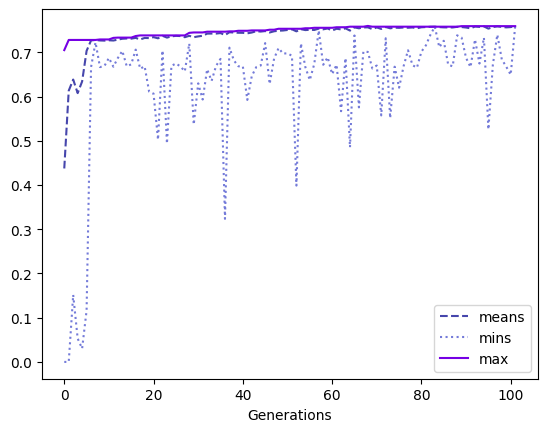

In [9]:
plot_stats(stats, "convergenceOptimun.eps")

In [10]:
SAsolution  = SA_max(
    solution = fittest_individual,
    search = search,
    Tf= 0,
    cooling_rate = 35,  
    beta = 0.001,
    reduce_temp=0.000001,  #0.0001
    seed_random= 123,
    alpha = 0.07,
    max_iterations = 150, #100
    fitnessFunction = lambda x: MLP(architecture=architecture,
                                       X_train = X_train,
                                       y_train = y_train,
                                       initial_solution=x,
                                       score = f1_score))

1
(0.76,) Temperarure : 0.0007585356550580431
2
(0.7595356550580431,) Temperarure : 0.0007575356550580431
3
(0.7562189054726368,) Temperarure : 0.0007565356550580431
4
(0.7582781456953642,) Temperarure : 0.0007555356550580431
5
(0.7574750830564784,) Temperarure : 0.000754535655058043
6
(0.7582781456953642,) Temperarure : 0.000753535655058043
7
(0.760797342192691,) Temperarure : 0.000752535655058043
8
(0.7582781456953642,) Temperarure : 0.000751535655058043
9
(0.7582781456953642,) Temperarure : 0.000750535655058043
10
(0.7570247933884298,) Temperarure : 0.0007495356550580429
11
(0.7595356550580431,) Temperarure : 0.0007485356550580429
12
(0.7595356550580431,) Temperarure : 0.0007475356550580429
13
(0.7595356550580431,) Temperarure : 0.0007465356550580429
14
(0.7587354409317804,) Temperarure : 0.0007455356550580428
15
(0.762063227953411,) Temperarure : 0.0007445356550580428
16
(0.762063227953411,) Temperarure : 0.0007435356550580428
17
(0.762063227953411,) Temperarure : 0.000742535655058

In [11]:
SAsolution

{'major': ((0.770764119601329,),
  array([ -6.34135116,   9.63402352, -11.84197869,   2.05811428,
         -21.58953843,   7.83985092,  -0.3312927 ,   5.64730343,
           1.33908265,   8.05433924,  -3.13909706,   2.00398705,
          -2.09769369,  -3.14249225, -13.27149656,  26.42791401,
           5.11743449, -15.27964447,  -8.55639114,  16.16464491,
           6.79828095,   1.4725455 ,  20.0383824 ,   2.84388808,
         -12.16012325,  -1.47896939,  17.02512206,   4.68738314,
         -15.43643031,   5.80030645, -24.24709737,   3.15314497,
          13.85447104,   1.84134121,  -4.90468031,   0.2489044 ,
          -0.53368674,  -9.73338385,  -8.50651088,  10.55004235,
          -6.8999028 ,   5.115456  ,  12.2855928 , -10.95012224,
         -21.24279789,  13.28928462,  -9.37897935,  -2.01470365,
         -15.97169269,  22.05153491,  18.97250356,  20.3421168 ,
          -7.45187202,  -0.92454726,  -3.86467838,  -5.83046716,
         -15.07111009,   8.94384434, -14.52810614,  -3.06

In [12]:
MLP(architecture=architecture, X_train=X_train, y_train=y_train, 
                          initial_solution=SAsolution['major'][1],  score=f1_score)

(0.770764119601329,)

In [13]:
preds_GASA = np.where(MLP(architecture=architecture, X_train=X_test, y_train=y_test, 
                          initial_solution=SAsolution['major'][1], 
                          preds=True)>0.5,1,0)
GASA  = pd.DataFrame(classification_report(y_test, preds_GASA, output_dict=True)).iloc[:,0:2]


c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [14]:
models_tab = pd.concat([GA, GASA], axis=1)
cols_names =  pd.MultiIndex.from_tuples([('Genetic training f1','No-Default'),("Genetic training f1",'Deafult'),
              ("Genetic annealing training f1",'No-Default'),('Genetic annealing training f1','Default')])
models_tab.columns  = cols_names
models_tab = models_tab.style.set_table_styles([
   {'selector': 'th','props': [('text-align', 'center')]}]).format(precision=2)
models_tab.to_latex("f1-models.tex")
models_tab

In [15]:
y_test.value_counts()

event
0.0    3296
1.0      64
Name: count, dtype: int64

In [16]:
3296 + 64

3360

In [17]:
preds_GASA.sum()

2179

In [18]:
preds_GASA.sum() / y_test.shape

array([0.6485119])

In [19]:
X_train.index

Index([11250, 14336,  9571,  3175,  8136,  3385,   822, 12247,  3985, 13209,
       ...
        4788,  4985,  2971,  6943,  9109,  1157,  3242,  9792,  9255,   987],
      dtype='int64', length=508)

In [20]:
X_train.describe()

,ROE,ROA,IR,RSL,Sector_D,Sector_E,Sector_G,Sector_J,Sector_K,Sector_L,Sector_M,Sector_O,Sector_Q,Sector_R
count,508.000000,5.080000e+02,5.080000e+02,5.080000e+02,508.0,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0,508.000000,508.000000
mean,0.000000,2.797412e-17,1.398706e-16,1.678447e-16,0.0,0.001969,0.297244,0.031496,0.019685,0.055118,0.053150,0.0,0.003937,0.007874
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.044368,0.457495,0.174826,0.139053,0.228436,0.224553,0.0,0.062684,0.088473
min,-20.432386,-1.442665e+01,-9.037867e-01,-1.877211e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.031782,1.892854e-02,-3.347233e-01,-9.058330e-01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.053442,1.455670e-01,-7.805332e-02,1.117814e-01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.090878,2.686279e-01,1.400104e-01,1.032800e+00,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.526417,1.761250e+00,1.766741e+01,1.169591e+00,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [21]:
y_test.index

Index([19146,  3820, 10870, 17643, 18621,  9242, 13245, 20033,   952,  4099,
       ...
        1161, 19710,  9821, 15427,  8818, 10170,  8837,  3652, 19586, 13580],
      dtype='int64', length=3360)

In [22]:
y_train.value_counts()

event
0.0    254
1.0    254
Name: count, dtype: int64

In [23]:
y_test.value_counts()

event
0.0    3296
1.0      64
Name: count, dtype: int64